<a href="https://colab.research.google.com/github/nuyhc/RhythmStudy/blob/main/1.%20PyTorch/PTM_2_%EB%B0%95%EC%A7%80%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [PTM] 4장. 실제 데이터를 텐서로 표현하기

In [1]:
!git clone https://github.com/deep-learning-with-pytorch/dlwpt-code

Cloning into 'dlwpt-code'...
remote: Enumerating objects: 703, done.
remote: Total 703 (delta 0), reused 0 (delta 0), pack-reused 703
Receiving objects: 100% (703/703), 176.00 MiB | 17.11 MiB/s, done.
Resolving deltas: 100% (309/309), done.
Checking out files: 100% (228/228), done.


In [2]:
import torch
import imageio

img_arr = imageio.imread('/content/dlwpt-code/data/p1ch4/image-dog/bobby.jpg')
img_arr.shape  # C X H X W

(720, 1280, 3)

In [3]:
# 레이아웃 변경하기
# permute 메소드: 새로운 차원으로 변경
img = torch.from_numpy(img_arr)
img.permute(2, 0, 1).shape  # img.shape -> (1280, 720, 3)

torch.Size([3, 720, 1280])

### 첫번째 차원에 여러 이미지를 batch로 넣어 N X C X H X W 텐서로 저장

In [4]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)
batch

tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]],


        [[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0

In [5]:
import os

data_dir = '/content/dlwpt-code/data/p1ch4/image-cats/'
filename = [name for name in os.listdir(data_dir)
            if os.path.splitext(name)[-1] == '.png']
for i, filename in enumerate(filename):
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3]  # RGB만 사용하므로 첫 세 개의 채널만 유지
    batch[i] = img_t

In [6]:
batch[i].shape  # N X C X H X W

torch.Size([3, 256, 256])

### 데이터 정규화

In [7]:
batch = batch.float()
batch /= 255.0
batch

tensor([[[[0.9333, 0.9333, 0.9333,  ..., 0.8392, 0.8431, 0.8431],
          [0.9333, 0.9333, 0.9333,  ..., 0.8392, 0.8431, 0.8431],
          [0.9333, 0.9333, 0.9333,  ..., 0.8392, 0.8431, 0.8431],
          ...,
          [0.8392, 0.8353, 0.8314,  ..., 0.7333, 0.7451, 0.7569],
          [0.8392, 0.8353, 0.8314,  ..., 0.7294, 0.7451, 0.7529],
          [0.8392, 0.8353, 0.8314,  ..., 0.7294, 0.7451, 0.7529]],

         [[0.7647, 0.7647, 0.7647,  ..., 0.6784, 0.6863, 0.6863],
          [0.7647, 0.7647, 0.7647,  ..., 0.6784, 0.6863, 0.6863],
          [0.7647, 0.7647, 0.7647,  ..., 0.6784, 0.6863, 0.6863],
          ...,
          [0.5020, 0.4980, 0.4941,  ..., 0.3922, 0.4039, 0.4157],
          [0.5020, 0.4980, 0.4941,  ..., 0.3882, 0.4039, 0.4118],
          [0.5020, 0.4980, 0.4941,  ..., 0.3882, 0.4039, 0.4118]],

         [[0.5373, 0.5373, 0.5373,  ..., 0.4902, 0.4941, 0.4941],
          [0.5373, 0.5373, 0.5373,  ..., 0.4902, 0.4941, 0.4941],
          [0.5373, 0.5373, 0.5373,  ..., 0

In [8]:
n_channals = batch.shape[1]
n_channals

3

하나의 배치 이미지 묶음만 정규화함.  
* 실제로 이미지로 작업할 때는, 미리 모든 훈련 데이터에 대한 `평균`과 `표준 편차`를  
계산해서 사전에 계산되고 고정된 값으로 빼고 나누는 방법이 좋은 관례이다.

In [9]:
n_channals = batch.shape[1]
for c in range(n_channals):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std

In [10]:
batch

tensor([[[[ 1.5978,  1.5978,  1.5978,  ...,  1.1723,  1.1900,  1.1900],
          [ 1.5978,  1.5978,  1.5978,  ...,  1.1723,  1.1900,  1.1900],
          [ 1.5978,  1.5978,  1.5978,  ...,  1.1723,  1.1900,  1.1900],
          ...,
          [ 1.1723,  1.1545,  1.1368,  ...,  0.6936,  0.7467,  0.7999],
          [ 1.1723,  1.1545,  1.1368,  ...,  0.6758,  0.7467,  0.7822],
          [ 1.1723,  1.1545,  1.1368,  ...,  0.6758,  0.7467,  0.7822]],

         [[ 1.5253,  1.5253,  1.5253,  ...,  1.1081,  1.1460,  1.1460],
          [ 1.5253,  1.5253,  1.5253,  ...,  1.1081,  1.1460,  1.1460],
          [ 1.5253,  1.5253,  1.5253,  ...,  1.1081,  1.1460,  1.1460],
          ...,
          [ 0.2546,  0.2356,  0.2167,  ..., -0.2765, -0.2196, -0.1627],
          [ 0.2546,  0.2356,  0.2167,  ..., -0.2954, -0.2196, -0.1816],
          [ 0.2546,  0.2356,  0.2167,  ..., -0.2954, -0.2196, -0.1816]],

         [[ 0.9417,  0.9417,  0.9417,  ...,  0.6979,  0.7182,  0.7182],
          [ 0.9417,  0.9417,  

### 3차원 이미지: 용적 데이터

---
특수 포맷 로딩

In [11]:
# 특수 포맷 로딩
import imageio

dir_path = '/content/dlwpt-code/data/p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083'
vol_arr = imageio.volread(dir_path, 'DICOM')
vol_arr.shape

Reading DICOM (examining files): 1/99 files (1.0%)79/99 files (79.8%)99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 6/99  (6.1%)56/99  (56.6%)99/99  (100.0%)


(99, 512, 512)

In [12]:
# unsqueeze를 사용해서 channel 차원을 위한 공간 생성
vol = torch.from_numpy(vol_arr).float()
vol = torch.unsqueeze(vol, 0)

vol.shape  # C X 이미지 개수 X H X W

torch.Size([1, 99, 512, 512])

In [13]:
vol

tensor([[[[ -985.,  -990.,  -999.,  ..., -1017., -1008.,  -971.],
          [-1016.,  -984.,  -963.,  ..., -1000., -1009.,  -999.],
          [-1024., -1008.,  -996.,  ...,  -979., -1021.,  -987.],
          ...,
          [ -920.,  -942.,  -944.,  ...,  -893.,  -917.,  -955.],
          [ -871.,  -879.,  -905.,  ...,  -895.,  -869.,  -867.],
          [ -876.,  -855.,  -873.,  ...,  -933.,  -982.,  -936.]],

         [[ -982.,  -989., -1020.,  ...,  -988.,  -977.,  -980.],
          [-1015.,  -969.,  -980.,  ...,  -981.,  -974., -1016.],
          [-1020.,  -978.,  -972.,  ...,  -988.,  -993., -1015.],
          ...,
          [ -880.,  -854.,  -924.,  ...,  -909.,  -829.,  -829.],
          [ -907.,  -868.,  -928.,  ...,  -909.,  -901.,  -894.],
          [ -885.,  -850.,  -899.,  ...,  -977.,  -964.,  -991.]],

         [[-1022., -1011.,  -983.,  ..., -1013.,  -980.,  -967.],
          [-1022., -1005., -1012.,  ...,  -948.,  -966., -1008.],
          [ -991.,  -965.,  -993.,  ...,  

테이블 데이터 표현하기

CSV 파일 로드하는 방법
* 파이썬에 내장된 CSV 모듈을 사용하는 법
* numpy
* pandas (가장 빠르고 메모리도 덜 쓰는 방식)

In [14]:
# numpy로 csv 파일 로드

import csv
import numpy as np

wine_path = '/content/dlwpt-code/data/p1ch4/tabular-wine/winequality-white.csv'
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";",
                         skiprows=1)
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [15]:
col_list = next(csv.reader(open(wine_path), delimiter=';'))

wineq_numpy.shape, col_list

((4898, 12),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [16]:
# Numpy 배열을 PyTorch tensor로 변환

wineq = torch.from_numpy(wineq_numpy)

wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

In [17]:
# Pandas로 csv 파일 로드

import pandas as pd

wine_df = pd.read_csv(wine_path, delimiter=';')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [18]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [19]:
# Pandas Dataframe을 PyTorch tensor로 변환

wine_tensor = torch.tensor(wine_df.values)

wine_tensor.shape, wine_tensor.dtype

(torch.Size([4898, 12]), torch.float64)

점수 표현하기

In [20]:
data = wineq[:, :-1]  # 모든 행과 마지막 열을 제외한 모든 열 선택
data, data.shape

(tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
         [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
         ...,
         [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
         [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]]),
 torch.Size([4898, 11]))

In [21]:
target = wineq[:, -1]  # 모든 행과 마지막 열 선택
target, target.shape

target = wineq[:, -1].long()
target

tensor([6, 6, 6,  ..., 6, 7, 6])

원핫 인코딩

In [22]:
target_onehot = torch.zeros(target.shape[0], 10)

target_onehot.scatter_(1, target.unsqueeze(1), 1.0)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [23]:
target_unsqueezed = target.unsqueeze(1)
target_unsqueezed

tensor([[6],
        [6],
        [6],
        ...,
        [6],
        [7],
        [6]])

### 언제 카테고리화 할 것인가
* 각 열의 평균, 표준 편차, 정규화

In [24]:
data_mean = torch.mean(data, dim=0)
data_mean

tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02, 3.5308e+01,
        1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01, 1.0514e+01])

In [25]:
data_var = torch.var(data, dim=0)
data_var

tensor([7.1211e-01, 1.0160e-02, 1.4646e-02, 2.5726e+01, 4.7733e-04, 2.8924e+02,
        1.8061e+03, 8.9455e-06, 2.2801e-02, 1.3025e-02, 1.5144e+00])

In [26]:
data_normalized = (data - data_mean) / torch.sqrt(data_var)
data_normalized

tensor([[ 1.7208e-01, -8.1761e-02,  2.1326e-01,  ..., -1.2468e+00,
         -3.4915e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  4.7996e-02,  ...,  7.3995e-01,
          1.3422e-03, -8.2419e-01],
        [ 1.4756e+00,  1.7450e-02,  5.4378e-01,  ...,  4.7505e-01,
         -4.3677e-01, -3.3663e-01],
        ...,
        [-4.2043e-01, -3.7940e-01, -1.1915e+00,  ..., -1.3130e+00,
         -2.6153e-01, -9.0545e-01],
        [-1.6054e+00,  1.1666e-01, -2.8253e-01,  ...,  1.0049e+00,
         -9.6251e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  3.7852e-01,  ...,  4.7505e-01,
         -1.4882e+00,  1.0448e+00]])

### 와인 데이터, 임계값으로 찾기

In [27]:
# 점수가 3 이하인 열을 target에서 거르기
bad_indexes = target <= 3
bad_indexes.shape, bad_indexes.dtype, bad_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(20))

In [28]:
bad_data = data[bad_indexes]
bad_data.shape

torch.Size([20, 11])

In [29]:
# 와인 정보를 좋음, 보통, 나쁨 카테고리로 나눔
bad_data = data[target <= 3]
mid_data = data[(target > 3) & (target < 7)]
good_data = data[target >= 7]

bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)

for i, args in enumerate(zip(col_list, bad_mean, mid_mean, good_mean)):
    print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

 0 fixed acidity          7.60   6.89   6.73
 1 volatile acidity       0.33   0.28   0.27
 2 citric acid            0.34   0.34   0.33
 3 residual sugar         6.39   6.71   5.26
 4 chlorides              0.05   0.05   0.04
 5 free sulfur dioxide   53.33  35.42  34.55
 6 total sulfur dioxide 170.60 141.83 125.25
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.18   3.22
 9 sulphates              0.47   0.49   0.50
10 alcohol               10.34  10.26  11.42


In [30]:
# 이산화황 총량에서 중앙점보다 낮은 인덱스만 가져오기
total_sulfur_threshold = 141.83
total_sulfur_data = data[:,6]
predicted_indexes = torch.lt(total_sulfur_data, total_sulfur_threshold)

predicted_indexes.shape, predicted_indexes.dtype, predicted_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(2727))

In [31]:
# 좋은 와인의 인덱스만 가져오기
actual_indexes = target > 5

actual_indexes.shape, actual_indexes.dtype, actual_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(3258))

In [32]:
# 예측한 순위와 실제 품질 순위에 논리 and 연산을 수행해서 얻은 교집합으로 평가하기
n_matches = torch.sum(actual_indexes & predicted_indexes).item()
n_predicted = torch.sum(predicted_indexes).item()
n_actual = torch.sum(actual_indexes).item()

n_matches, n_matches / n_predicted, n_matches / n_actual

(2018, 0.74000733406674, 0.6193984039287906)

### 시계열 데이터 다루기

In [33]:
bikes_numpy = np.loadtxt(
    "/content/dlwpt-code/data/p1ch4/bike-sharing-dataset/hour-fixed.csv", 
    dtype=np.float32, 
    delimiter=",", 
    skiprows=1, 
    converters={1: lambda x: float(x[8:10])}) # <1>
bikes = torch.from_numpy(bikes_numpy)
bikes

tensor([[1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 3.0000e+00, 1.3000e+01,
         1.6000e+01],
        [2.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 8.0000e+00, 3.2000e+01,
         4.0000e+01],
        [3.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 5.0000e+00, 2.7000e+01,
         3.2000e+01],
        ...,
        [1.7377e+04, 3.1000e+01, 1.0000e+00,  ..., 7.0000e+00, 8.3000e+01,
         9.0000e+01],
        [1.7378e+04, 3.1000e+01, 1.0000e+00,  ..., 1.3000e+01, 4.8000e+01,
         6.1000e+01],
        [1.7379e+04, 3.1000e+01, 1.0000e+00,  ..., 1.2000e+01, 3.7000e+01,
         4.9000e+01]])

In [34]:
# 일별로 매 시간의 데이터셋을 구하기 위해 동일한 텐서를 24시간 배치로 바라보는 뷰가 필요
bikes.shape, bikes.stride()

(torch.Size([17520, 17]), (17, 1))

In [35]:
# 일자, 시간, 17개 열의 세 개 축으로 만들기
daily_bikes = bikes.view(-1, 24, bikes.shape[1])
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 24, 17]), (408, 17, 1))

In [36]:
# N X C X L
daily_bikes = daily_bikes.transpose(1, 2)
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 17, 24]), (408, 1, 17))

In [37]:
# 하루 시간대 만큼의 행과 날씨 상태 가짓수 만큼의 열을 가진, 0으로 채워진 행렬을 초기화
first_day = bikes[:24].long()
weather_onehot = torch.zeros(first_day.shape[0], 4)
first_day[:,9]

tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2])

In [38]:
# 날씨 수준에 따라 행령을 원핫 인코딩으로 변환
weather_onehot.scatter_(
    dim=1, 
    index=first_day[:,9].unsqueeze(1).long() - 1,
    value=1.0)

tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])

In [39]:
# 만들어진 행령을 원래 데이터셋에 cat 함수를 사용해 병합
torch.cat((bikes[:24], weather_onehot), 1)[:1]

tensor([[ 1.0000,  1.0000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  6.0000,
          0.0000,  1.0000,  0.2400,  0.2879,  0.8100,  0.0000,  3.0000, 13.0000,
         16.0000,  1.0000,  0.0000,  0.0000,  0.0000]])

In [40]:
# 값이 0이고 크기가 각각 B, L, 추가 열의 크기는 C인 텐서 만들기
daily_weather_onehot = torch.zeros(daily_bikes.shape[0], 4,
                                   daily_bikes.shape[2])
daily_weather_onehot.shape

torch.Size([730, 4, 24])

In [41]:
# 텐서의 C차원에 원핫 인코딩 늘어놓기
daily_weather_onehot.scatter_(
    1, daily_bikes[:,9,:].long().unsqueeze(1) - 1, 1.0)
daily_weather_onehot.shape

torch.Size([730, 4, 24])

In [42]:
# C차원을 따라 원핫 인코딩 병합
daily_bikes = torch.cat((daily_bikes, daily_weather_onehot), dim=1)

In [43]:
temp = daily_bikes[:, 10, :]
temp_min = torch.min(temp)
temp_max = torch.max(temp)
daily_bikes[:, 10, :] = ((daily_bikes[:, 10, :] - temp_min)
                         / (temp_max - temp_min))

In [44]:
temp = daily_bikes[:, 10, :]
daily_bikes[:, 10, :] = ((daily_bikes[:, 10, :] - torch.mean(temp))
                         / torch.std(temp))

### 텍스트를 숫자로 변화하기

In [45]:
with open('/content/dlwpt-code/data/p1ch4/jane-austen/1342-0.txt', encoding='utf8') as f:
    text = f.read()

In [46]:
lines = text.split('\n')
line = lines[200]
line

'“Impossible, Mr. Bennet, impossible, when I am not acquainted with him'

In [47]:
letter_t = torch.zeros(len(line), 128)
letter_t.shape

torch.Size([70, 128])

In [48]:
for i, letter in enumerate(line.lower().strip()):
    letter_index = ord(letter) if ord(letter) < 128 else 0  # <1>
    letter_t[i][letter_index] = 1

In [49]:
def clean_words(input_str):
    punctuation = '.,;:"!?”“_-'
    word_list = input_str.lower().replace('\n',' ').split()
    word_list = [word.strip(punctuation) for word in word_list]
    return word_list

words_in_line = clean_words(line)
line, words_in_line

('“Impossible, Mr. Bennet, impossible, when I am not acquainted with him',
 ['impossible',
  'mr',
  'bennet',
  'impossible',
  'when',
  'i',
  'am',
  'not',
  'acquainted',
  'with',
  'him'])

In [50]:
word_list = sorted(set(clean_words(text)))
word2index_dict = {word: i for (i, word) in enumerate(word_list)}

len(word2index_dict), word2index_dict['impossible']

(7261, 3394)

In [51]:
word_t = torch.zeros(len(words_in_line), len(word2index_dict))
for i, word in enumerate(words_in_line):
    word_index = word2index_dict[word]
    word_t[i][word_index] = 1
    print('{:2} {:4} {}'.format(i, word_index, word))
    
print(word_t.shape)

 0 3394 impossible
 1 4305 mr
 2  813 bennet
 3 3394 impossible
 4 7078 when
 5 3315 i
 6  415 am
 7 4436 not
 8  239 acquainted
 9 7148 with
10 3215 him
torch.Size([11, 7261])


In [52]:
word_t = word_t.unsqueeze(1)
word_t.shape

torch.Size([11, 1, 7261])

In [53]:
[(c, ord(c)) for c in sorted(set(text))]

[('\n', 10),
 (' ', 32),
 ('!', 33),
 ('#', 35),
 ('$', 36),
 ('%', 37),
 ("'", 39),
 ('(', 40),
 (')', 41),
 ('*', 42),
 (',', 44),
 ('-', 45),
 ('.', 46),
 ('/', 47),
 ('0', 48),
 ('1', 49),
 ('2', 50),
 ('3', 51),
 ('4', 52),
 ('5', 53),
 ('6', 54),
 ('7', 55),
 ('8', 56),
 ('9', 57),
 (':', 58),
 (';', 59),
 ('?', 63),
 ('@', 64),
 ('A', 65),
 ('B', 66),
 ('C', 67),
 ('D', 68),
 ('E', 69),
 ('F', 70),
 ('G', 71),
 ('H', 72),
 ('I', 73),
 ('J', 74),
 ('K', 75),
 ('L', 76),
 ('M', 77),
 ('N', 78),
 ('O', 79),
 ('P', 80),
 ('Q', 81),
 ('R', 82),
 ('S', 83),
 ('T', 84),
 ('U', 85),
 ('V', 86),
 ('W', 87),
 ('X', 88),
 ('Y', 89),
 ('Z', 90),
 ('[', 91),
 (']', 93),
 ('_', 95),
 ('a', 97),
 ('b', 98),
 ('c', 99),
 ('d', 100),
 ('e', 101),
 ('f', 102),
 ('g', 103),
 ('h', 104),
 ('i', 105),
 ('j', 106),
 ('k', 107),
 ('l', 108),
 ('m', 109),
 ('n', 110),
 ('o', 111),
 ('p', 112),
 ('q', 113),
 ('r', 114),
 ('s', 115),
 ('t', 116),
 ('u', 117),
 ('v', 118),
 ('w', 119),
 ('x', 120),
 ('y',

In [54]:
ord('l')

108

# [PTM] 5장. 학습 기법

### 온도 문제

In [55]:
# 데이터 수집
import torch

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

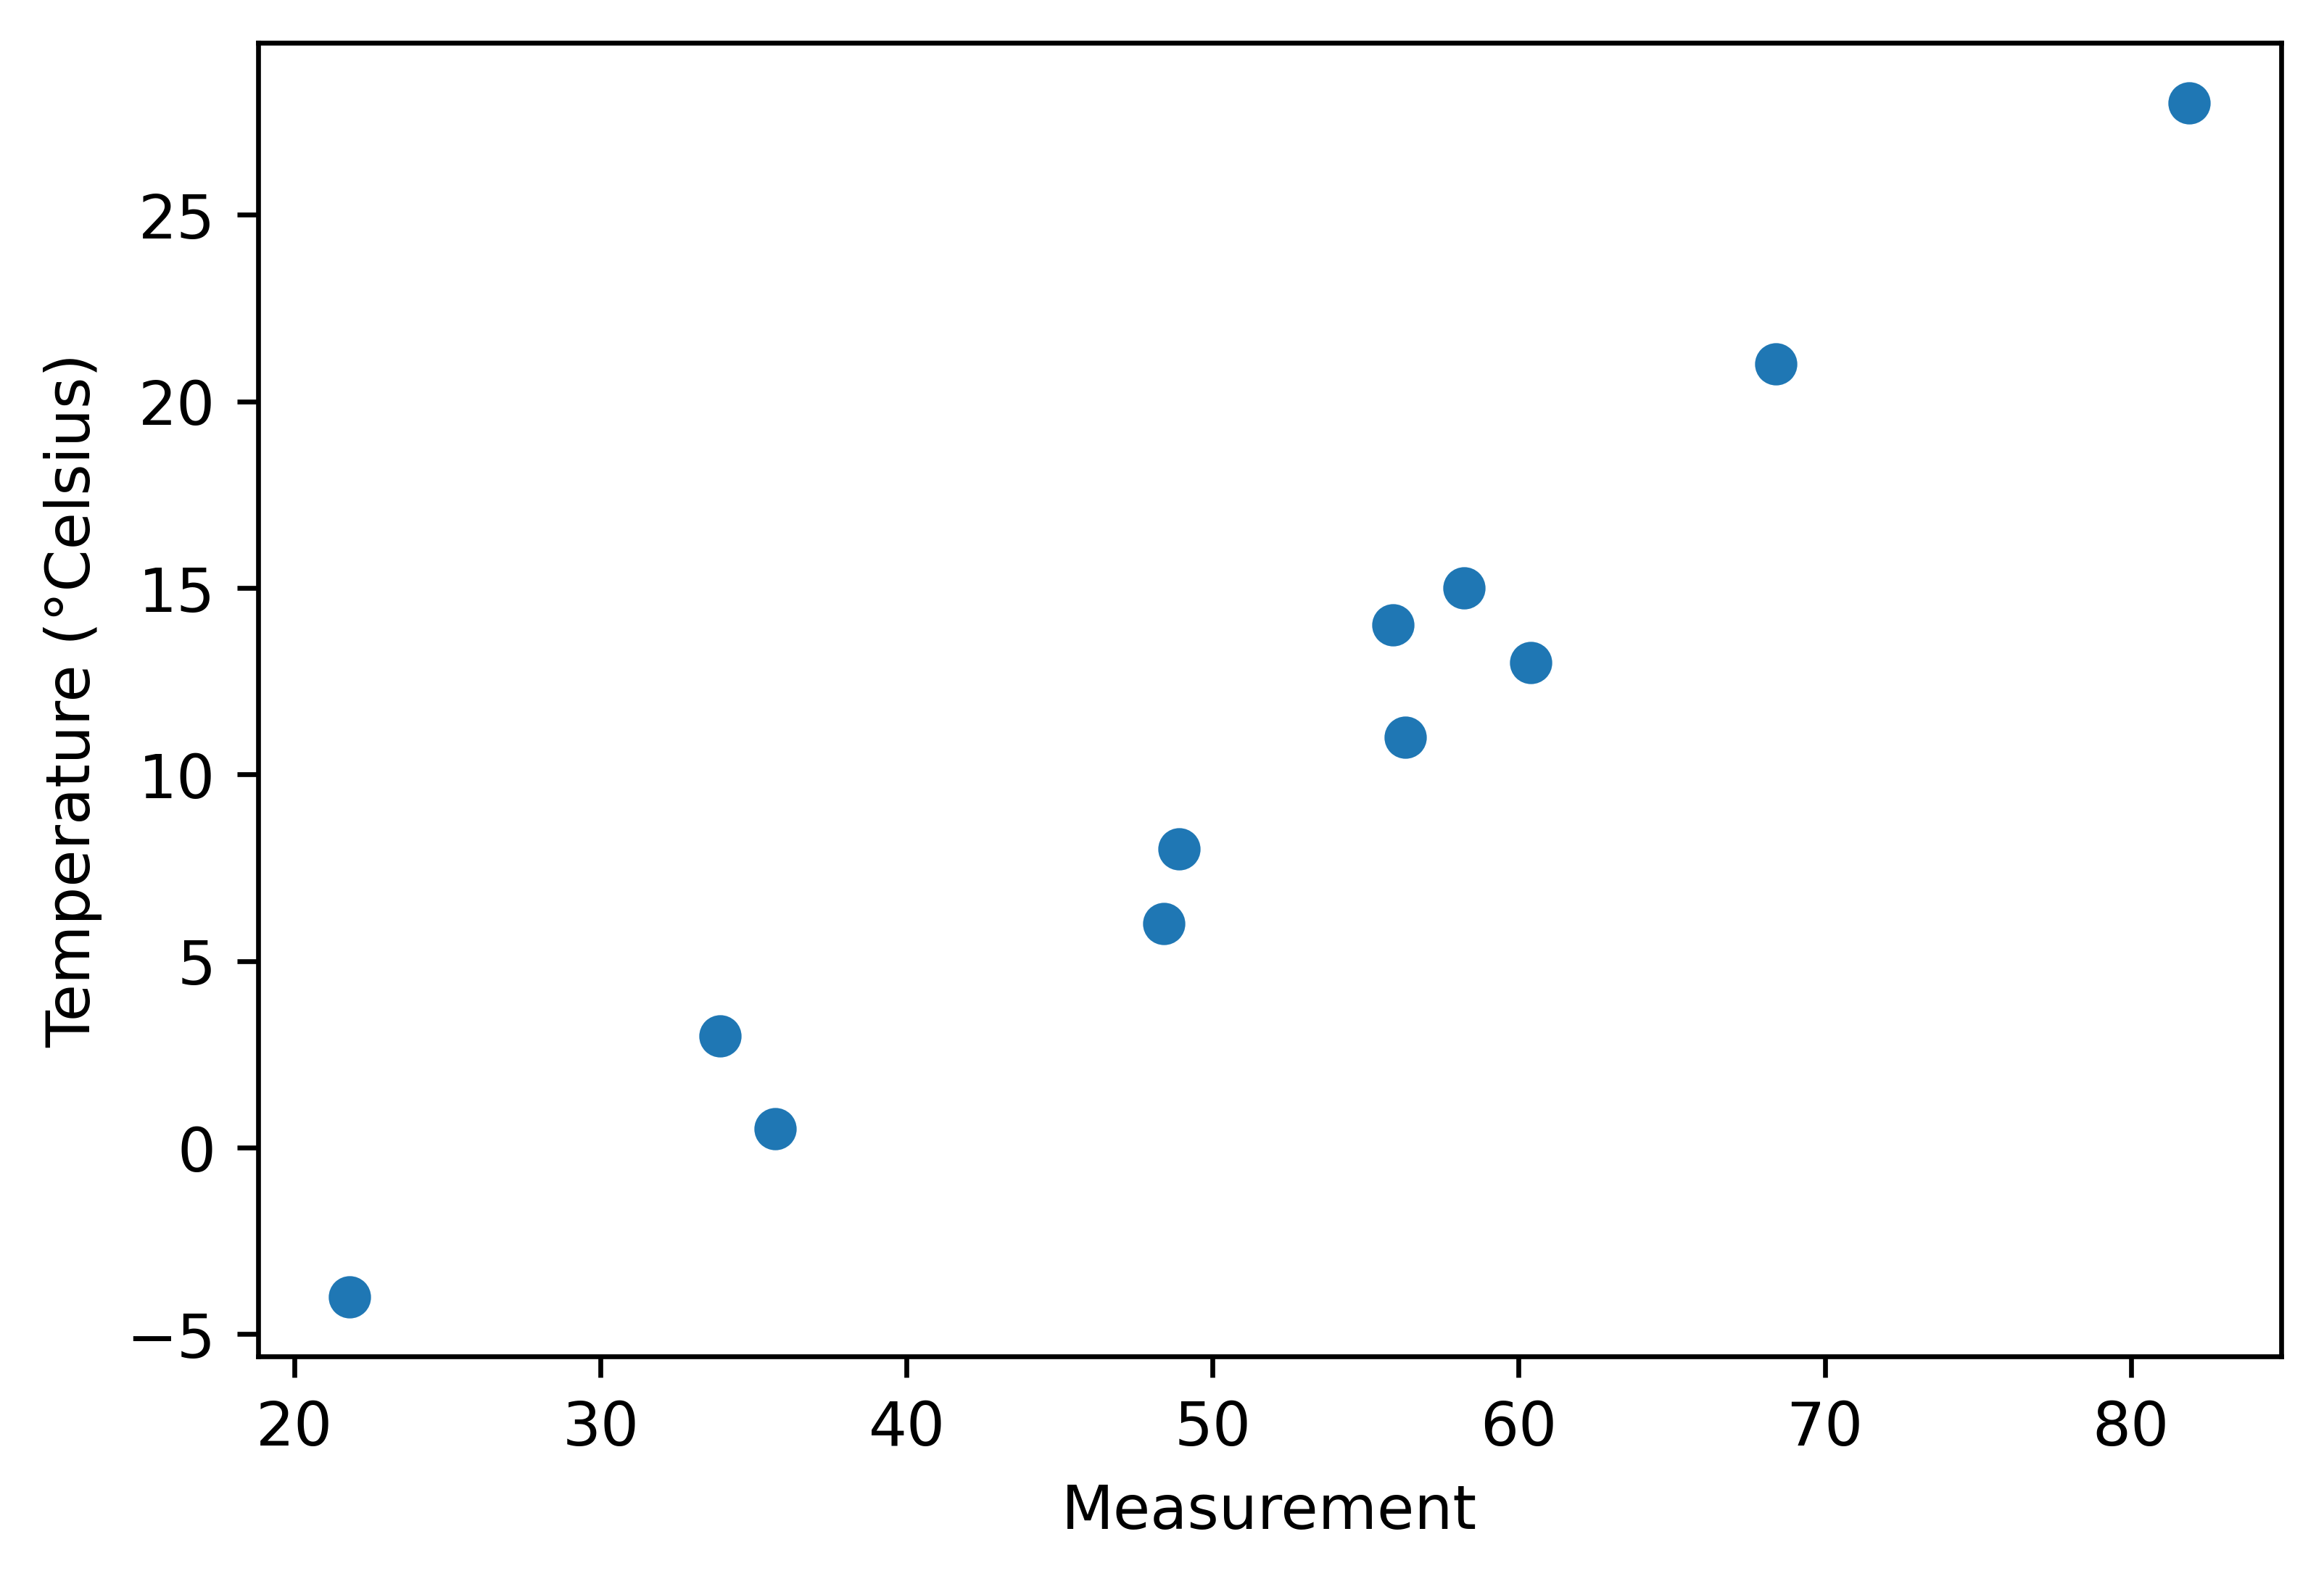

In [56]:
%matplotlib inline
from matplotlib import pyplot as plt

fig = plt.figure(dpi=600)
plt.xlabel("Measurement")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.show()

# plt.savefig("temp_data_plot.png", format="png")

모델
* t_u: 입력 텐서, w: 가중치 파라미터, b: 편향값 파라미터
* 파라미터는 pytorch의 스칼라값이고 행렬곱 연산은 텐서를 반환하기 위해 브로드캐스팅 방식을 사용한다.

In [57]:
def model(t_u, w, b):
    return w * t_u + b

손실 함수(비용함수)
* 학습 과정이 최소화하고자 하는 `단일 값`을 계산하는 함수
* 손실 함수는 크든 작든 간에 항상 `양수`의 차이가 나오게 해서 t_p가 t_c로 맞춰가는 데 사용할 수 있게 해야 한다. 
* 항상 양수의 차이가 나오게 하기 위해 `|t_p - t_c|` 또는 `(t_p - t_c)**2`를 사용할 수 있다.

> `|t_p - t_c|` 절대값을 사용한 경우는 수렴하고자 하는 경우에 미분값을 정의할 수 없다.

* 훈련 샘플로부터 나오는 오차 중 어떤 경우를 `우선해서 보완`해 나갈 것인지를 결정
* 즉, `파라미터 조정`은 손실값이 적은 샘플의 출력을 변경하기보다 가중치가 큰 샘플을 우선적으로 보정하게 된다.

In [58]:
# 해당 모델에서는 loss funtion을 mean squared error 식으로 계산
# t_p: 모델이 출력한 온도
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2  # 또는 |t_p - t_c|
    return squared_diffs.mean()

* 파라미터 초기화, 모델 호출

In [59]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

* 손실값 체크

In [60]:
# 손실값
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

브로드캐스팅
* 예제에서는 두 개의 스칼라값(0차원 텐서)인 w와 b가 있고 이를 길이가 b인(1차원 텐서) 벡터와 곱셈 및 덧셈을 수행한다.

브로드캐스팅 연산 규칙
* 차원 인덱스를 뒤에서부터 세면서 만일 해당 차원의 피연산자에 해당하는 차원의 크기가 1이면, 파이토치는 단일 요소를 가진 차원에 대응하는 다른 텐서 차원의 각 요소에 이 차원의 단일 요소를 사용할 것이다.
* 만일 연산 대상인 차원이 둘 다 1보다 크면 둘의 크기는 같아야 하고 일대일로 대응해서 연산한다.
* 만일 한 텐서가 다른 텐서보다 차원이 큰 경우, 차원이 큰 텐서의 각 차원에 대해 차원이 작은 텐서 전체가 대응하여 연산을 수행한다.

In [61]:
# 브로드캐스팅
x = torch.ones(())
y = torch.ones(3,1)
z = torch.ones(1,3)
a = torch.ones(2, 1, 1)
print(f"shapes: x: {x.shape}, y: {y.shape}")  # shape는 size 함수와 같은 기능임
print(f"        z: {z.shape}, a: {a.shape}")
print("x * y:", (x * y).shape)
print("y * z:", (y * z).shape)
print("y * z * a:", (y * z * a).shape)

shapes: x: torch.Size([]), y: torch.Size([3, 1])
        z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])
x * y: torch.Size([3, 1])
y * z: torch.Size([3, 3])
y * z * a: torch.Size([2, 3, 3])


### 손실 줄이기

경사하강
* 각 파라미터와 관련해 손실의 변화율을 계산해 손실이 줄어드는 방향으로 파라미터 값을 바꿔나간다.
* 현재 w값 근방의 어느 정도 떨어진 곳에서는 변화율이 급격하게 달라질 수 있기 때문에 일반적으로 파라미터 값

In [62]:
delta = 0.1

loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) - 
     loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [63]:
learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w

In [64]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) - 
     loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b

### 미분 계산하기


In [65]:
# 미분식 만들기
# 선형 함수
# 손실 함수는 제곱의 합
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

# d x^2 / d x = 2 x
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)  # 평균의 도함수로 나눔
    return dsq_diffs

In [66]:
# 모델에 미분 적용하기
def model(t_u, w, b):
    return w * t_u + b

# 함수를 정의해서 미분 구하기
def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

In [67]:
# 경사 함수 정의하기
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()]) 

### 모델 적합을 위한 반복
훈련 샘플을 가지고 반복적으로 파라미터를 조정하는 훈련의 한 단위를 epoch라고 한다.

In [68]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # 순방향 전달
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  # 역방향 전달

        params = params - learning_rate * grad

        print('Epoch %d, Loss %f' % (epoch, float(loss))) # 로그가 많이 나올 수 있음
            
    return params

In [69]:
# 훈련 루프 실행
def training_loop(n_epochs, learning_rate, params, t_u, t_c,
                  print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # 순방향 전달
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  # 역방향 전달

        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:  # 로그가 많이 나올 수 있음
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break
            
    return params

training_loop(
    n_epochs = 100, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

Epoch 1, Loss 1763.884766
    Params: tensor([-44.1730,  -0.8260])
    Grad:   tensor([4517.2964,   82.6000])
Epoch 2, Loss 5802484.500000
    Params: tensor([2568.4011,   45.1637])
    Grad:   tensor([-261257.4062,   -4598.9702])
Epoch 3, Loss 19408029696.000000
    Params: tensor([-148527.7344,   -2616.3931])
    Grad:   tensor([15109614.0000,   266155.6875])
...
Epoch 10, Loss 90901105189019073810297959556841472.000000
    Params: tensor([3.2144e+17, 5.6621e+15])
    Grad:   tensor([-3.2700e+19, -5.7600e+17])
Epoch 11, Loss inf
    Params: tensor([-1.8590e+19, -3.2746e+17])
    Grad:   tensor([1.8912e+21, 3.3313e+19])


tensor([-1.8590e+19, -3.2746e+17])

### 과도한 훈련
어떻게 하면 `learing_rate * grad` 규모를 적절하게 제한할 수 있을까?
* 사실은 쉽다. learning_rate 값이 작으면 된다. 학습률은 우리가 기대한 대로 학습이 되지 않을 때 일반적을 바꿔볼 수 있는 값 중 하나이다.  

`하이퍼파라미터 튜닝`
* 훈련을 통해 모델의 파라미터가 훈련되는 반면 하이퍼파라미터는 이 학습 자체를 제어하는 역할을 한다. 이 튜닝은 다소 수작업이 필요하며 최적화 과정에 포함되지 않는다.

`문제점`
* learning_rate 파라미터 조정이 너무 조금씩이라 손실이 너무 느리게 줄어들다가 결국 멈춘다. 이 문제는 learning_rate를 조정 규모에 따라 변하는 적응형으로 만들어 방지할 수 있다. -> `grad` 조절

In [70]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

Epoch 1, Loss 1763.884766
    Params: tensor([ 0.5483, -0.0083])
    Grad:   tensor([4517.2964,   82.6000])
Epoch 2, Loss 323.090515
    Params: tensor([ 0.3623, -0.0118])
    Grad:   tensor([1859.5493,   35.7843])
Epoch 3, Loss 78.929634
    Params: tensor([ 0.2858, -0.0135])
    Grad:   tensor([765.4666,  16.5122])
...
Epoch 10, Loss 29.105247
    Params: tensor([ 0.2324, -0.0166])
    Grad:   tensor([1.4803, 3.0544])
Epoch 11, Loss 29.104168
    Params: tensor([ 0.2323, -0.0169])
    Grad:   tensor([0.5781, 3.0384])
...
Epoch 99, Loss 29.023582
    Params: tensor([ 0.2327, -0.0435])
    Grad:   tensor([-0.0533,  3.0226])
Epoch 100, Loss 29.022667
    Params: tensor([ 0.2327, -0.0438])
    Grad:   tensor([-0.0532,  3.0226])


tensor([ 0.2327, -0.0438])

### 입력 정규화
위의 나와있는 첫 에포크에서 가중치에 대한 기울기는 편향값에 대한 기울기보다 50배가 큰 것을 볼 수 있다. 즉, 가중치와 편향값은 범위가 다르다.


더 쉽게 파라미터 제어하는 방법
* 입력값을 변경해서 `기울기가 서로 큰 차이가 나지 않게` 하면 된다. 입력값의 범위가 -1.0에서 1.0 사이를 벗어나지 않도록 바꿔놓으면 가능해진다.

In [71]:
# 정규화된 버전의 t_u를 의미하는 것으로 변수 이름에 n을 붙임
t_un = 0.1 * t_u

In [72]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_un, # t_u 대신 범위를 조정한 t_un을 사용
    t_c = t_c)

Epoch 1, Loss 80.364342
    Params: tensor([1.7761, 0.1064])
    Grad:   tensor([-77.6140, -10.6400])
Epoch 2, Loss 37.574913
    Params: tensor([2.0848, 0.1303])
    Grad:   tensor([-30.8623,  -2.3864])
Epoch 3, Loss 30.871077
    Params: tensor([2.2094, 0.1217])
    Grad:   tensor([-12.4631,   0.8587])
...
Epoch 10, Loss 29.030489
    Params: tensor([ 2.3232, -0.0710])
    Grad:   tensor([-0.5355,  2.9295])
Epoch 11, Loss 28.941877
    Params: tensor([ 2.3284, -0.1003])
    Grad:   tensor([-0.5240,  2.9264])
...
Epoch 99, Loss 22.214186
    Params: tensor([ 2.7508, -2.4910])
    Grad:   tensor([-0.4453,  2.5208])
Epoch 100, Loss 22.148710
    Params: tensor([ 2.7553, -2.5162])
    Grad:   tensor([-0.4446,  2.5165])


tensor([ 2.7553, -2.5162])

In [73]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c,
    print_params = False)

params

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
...
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
...
Epoch 99, Loss 22.214186
Epoch 100, Loss 22.148710
...
Epoch 4000, Loss 2.927680
Epoch 5000, Loss 2.927648


tensor([  5.3671, -17.3012])

### 시각화

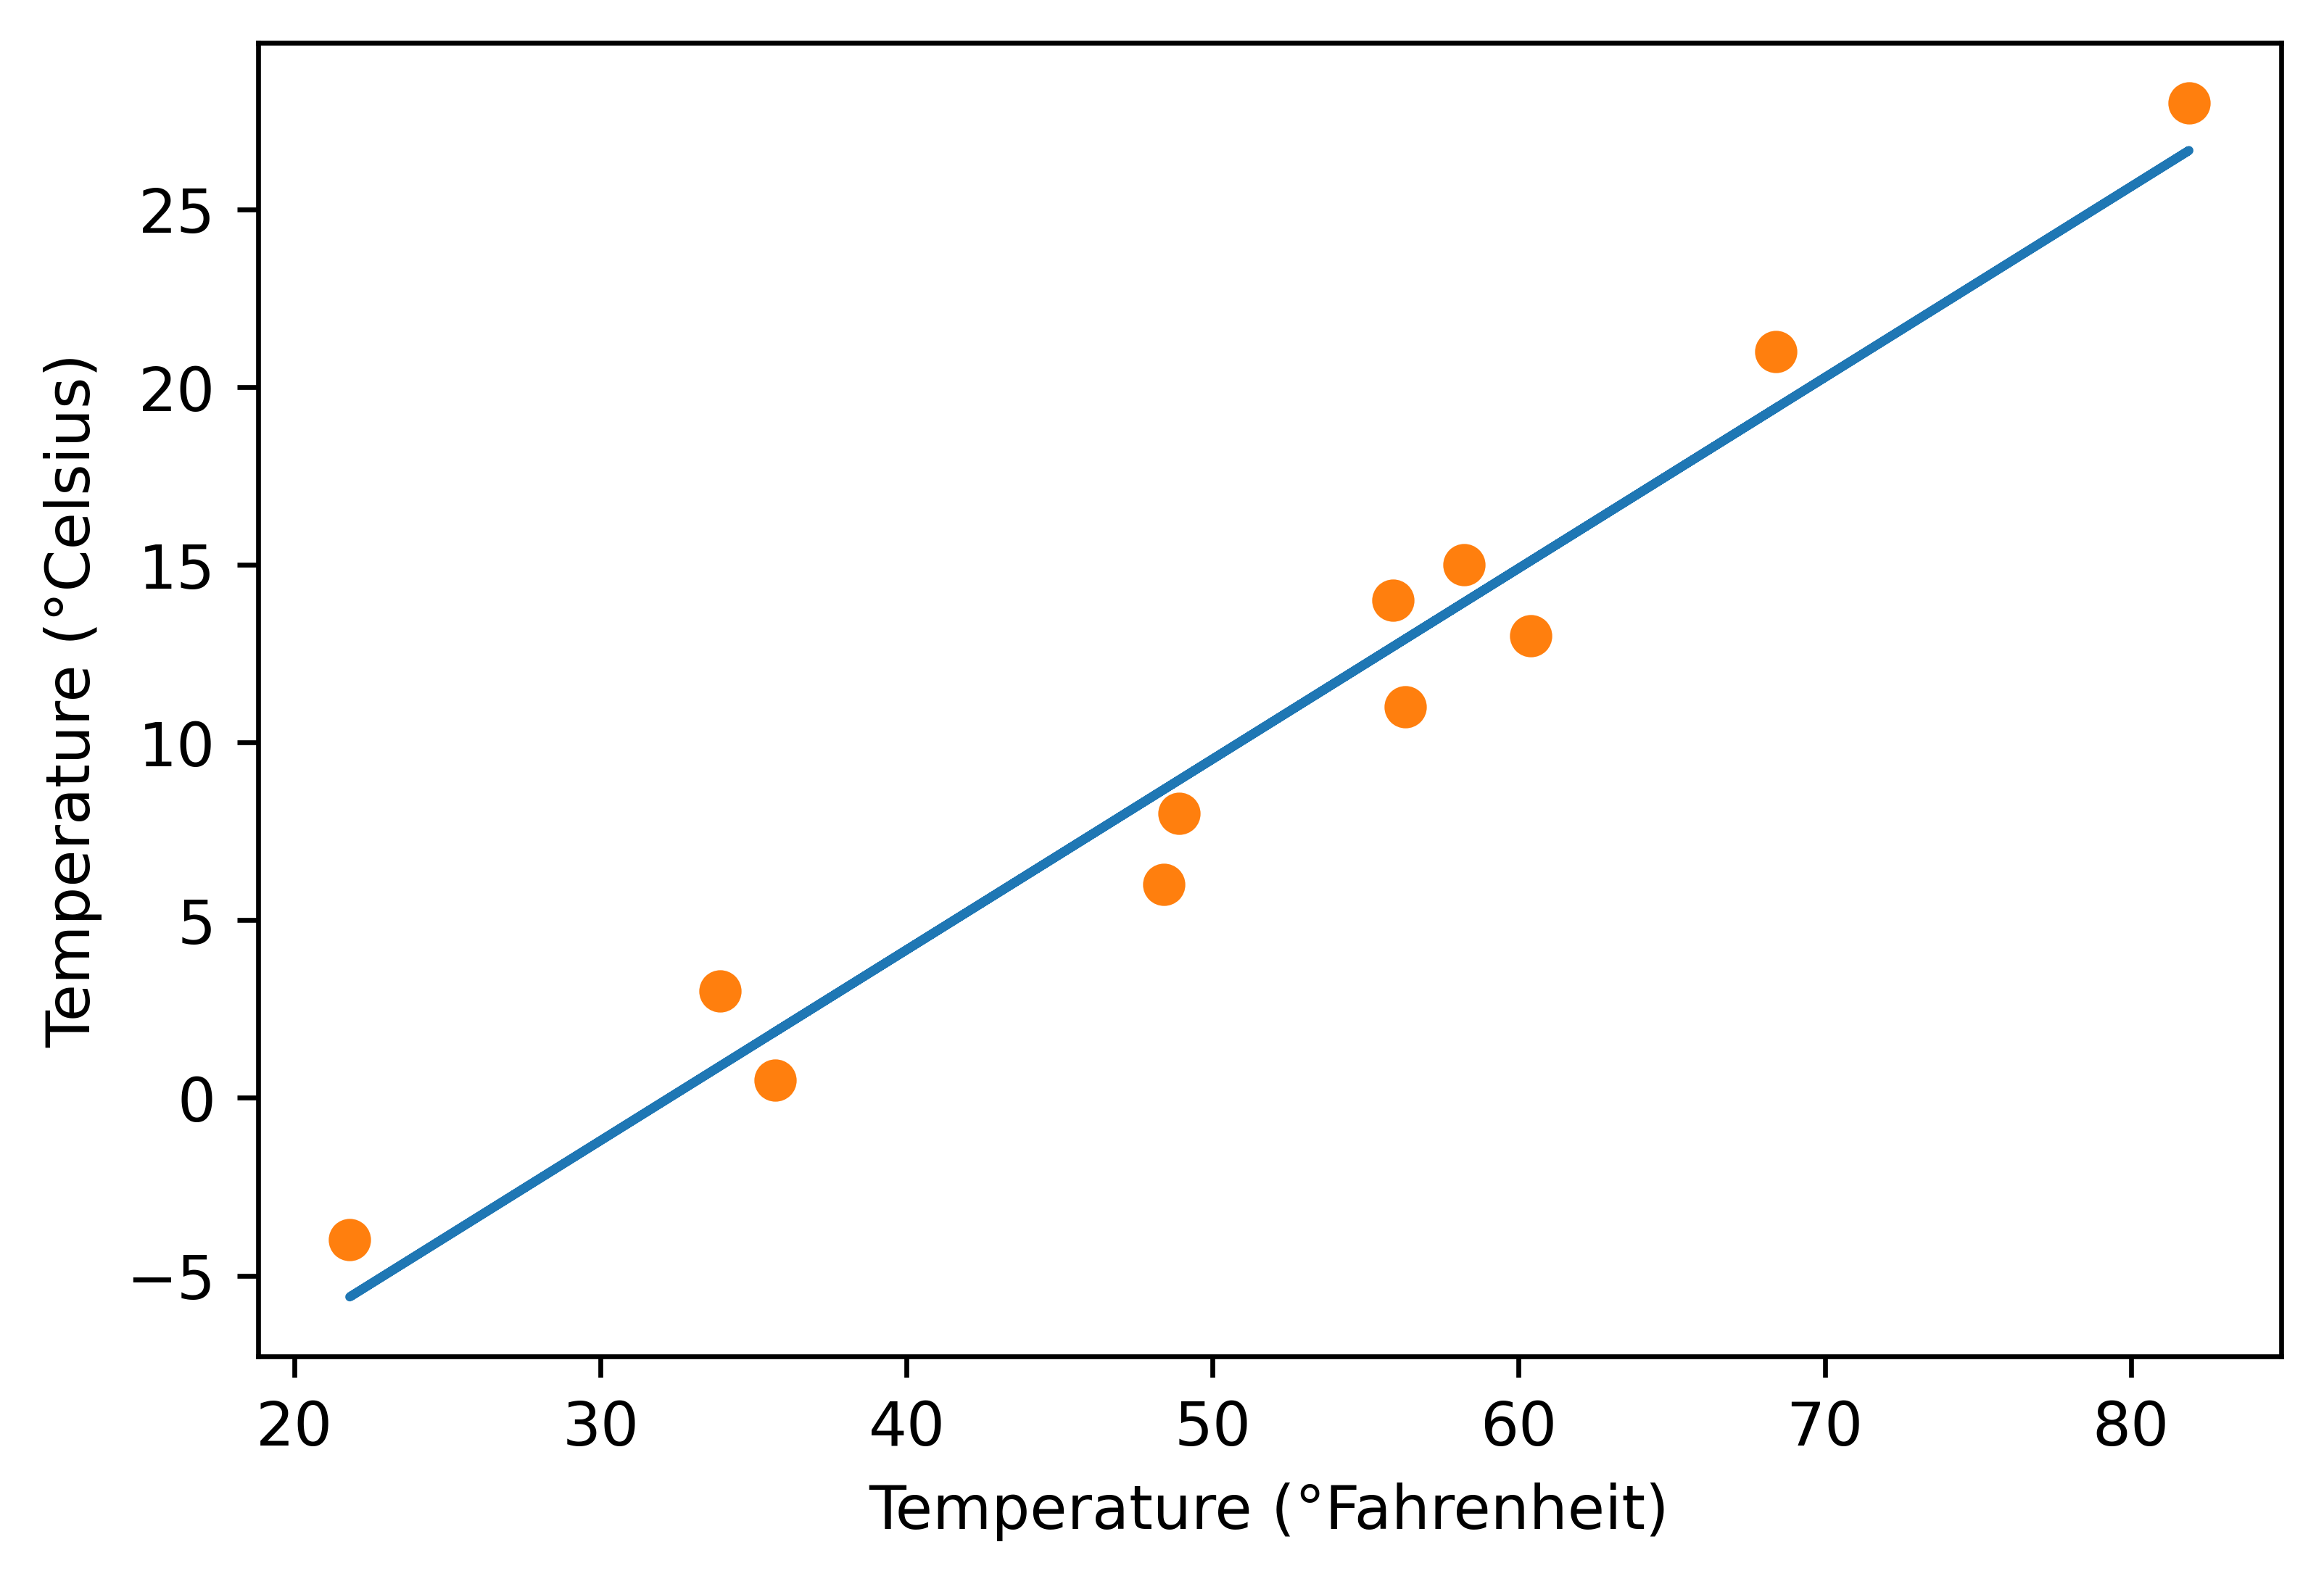

In [74]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params)  # 단위를 모르는 값을 정규화하여 훈련하고 있음, argument unpacking

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # 알 수 없는 원본 값을 그려보고 있음
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
# plt.savefig("temp_unknown_plot.png", format="png")

### 파이토치의 자동미분
* 모든 것을 역전파하라

기울기 자동 계산
* 어느 텐서에서 어떤 연산을 수행해서 만들어진 텐서인지 기억하고 있으며, 때문에 자연스럽게 미분을 최초 입력까지 연쇄적으로 적용해 올라갈 수 있다.

In [75]:
# 온도계 보정 코드
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0,
                    3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u

In [76]:
# 자동미분 적용하기
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

# 파라미터 텐서 다시 초기화
params = torch.tensor([1.0, 0.0], requires_grad=True)

In [77]:
# 미분 속성 사용하기
params.grad is None

True

In [78]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

params.grad

tensor([4517.2969,   82.6000])

미분 함수 누적하기
* `backward 호출`은 미분을 말단 노드에 누적한다. 따라서 앞서 backward가 호출되었다면 손실이 다시 계산되고 backward가 다시 호출되고 각 말단 노드의 기울기 값이 이전 반복문 수행 시 계산 되었던 기존값에 `누적`되어 부정확한 기울기값을 초래한다.
* 이를 방지하려면 각 반복문에서 `명시적으로 기울기를 0으로 초기화`해야 한다. 텐서 자체를 바꿔치지하는 `zero_메소드`를 사용하면 쉽게 초기화할 수 있다.

In [79]:
# 명시적으로 기울기를 0으로 초기화
if params.grad is not None:
    params.grad.zero_()

In [80]:
# 자동미분을 적용한 훈련 코드 전체
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # loss.backward() 호출 전 아무 위치에나 두면 됨
            params.grad.zero_()
        
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [81]:
training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0], requires_grad=True), # requires_grad=True가 핵심
    t_u = t_un, # 여기서도, t_u 대신 정규화된 t_un을 사용
    t_c = t_c)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

### 골라쓰는 옵티마이저

In [82]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [83]:
# 경사 하강 옵티마이저 사용하기
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

In [84]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()

optimizer.step()

params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [85]:
# zero_grad(backward 호출 직전) 추가하여 루프에 넣을 준비가 된 코드
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad()
loss.backward()
optimizer.step()

params

tensor([1.7761, 0.1064], requires_grad=True)

In [86]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [87]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate) # 동일한 파라미터

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params, # 동일한 파라미터
    t_u = t_un,
    t_c = t_c)

Epoch 500, Loss 7.860120
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

### 다른 옵티마이저 테스트하기

In [88]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate)  # 새 옵티마이저 클래스

training_loop(
    n_epochs = 2000, 
    optimizer = optimizer,
    params = params,
    t_u = t_u,
    t_c = t_c)

Epoch 500, Loss 7.612900
Epoch 1000, Loss 3.086700
Epoch 1500, Loss 2.928579
Epoch 2000, Loss 2.927644


tensor([  0.5367, -17.3021], requires_grad=True)

### 훈련, 검증, 과적합
손실을 구하거나 음의 기울기를 따라 내려갈 때 사용했던 데이터와는 다른 별개의 데이터를 사용하면 기대했던 것보다 높은 손실값을 얻을 수 있다. 그것을 `과적합`이라고 함.


In [89]:
# randperm 함수로 색인 순열을 찾기 위해 텐서 요소를 섞었을 때 인덱스를 반환
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices  # 랜덤이기 때문에, 실행했을 때 값이 다를 수 있음

(tensor([ 5,  2, 10,  9,  3,  0,  7,  6,  1]), tensor([8, 4]))

In [90]:
# 훈련, 검증 데이터셋 만들기
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_c

train_t_un, val_t_un

(tensor([4.8900, 5.8200, 6.8400, 6.0400, 8.1900, 3.5700, 2.1800, 3.3900, 5.5900]),
 tensor([0.6000, 1.1000]))

train_loss.backward
* train_t_u에서 만들어진 연산 그래프의 파라미터에 대해 train_loss의 미분을 누적한다.

zero_grad
* 기울기를 명시적으로 0으로 초기화하지 않으면 backward 호출 때마다 기울기가 누적되므로 zero_grad를 사용한다.

In [91]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
                  train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        val_t_p = model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f"Validation loss {val_loss.item():.4f}")
        
    return params

In [92]:
# def model(t_u, w, b):
#     return w * t_u + b

params = torch.tensor([1.0, 0.0], requires_grad = True)
learning_rate = 1e-2
optimizer = optim.SGD([params],lr=learning_rate)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,  # SGD를 사용하므로 정규화된 입력을 사용함
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c
)

Epoch 1, Training loss 94.8695,Validation loss 63.5850
Epoch 2, Training loss 41.5927,Validation loss 50.3158
Epoch 3, Training loss 33.5647,Validation loss 45.8432
Epoch 500, Training loss 6.1184,Validation loss 240.9356
Epoch 1000, Training loss 2.6418,Validation loss 355.7573
Epoch 1500, Training loss 2.1846,Validation loss 403.0034
Epoch 2000, Training loss 2.1245,Validation loss 420.8744
Epoch 2500, Training loss 2.1166,Validation loss 427.4526
Epoch 3000, Training loss 2.1155,Validation loss 429.8509


tensor([  5.3613, -16.7575], requires_grad=True)

`torch.no_grad` 콘텍스트 관리자  
torch.no_grad와 같은 콘텍스트 관리자는 자동미분 기능이 동작을 제어하는 데 사용할 수 있다.

* 필요하지 않을 때 자동미분을 끌 수 있게 해준다. 
* val_loss에 대해 backward를 호출하지 않으면서 처음에 연산 그래프를 만드는 이유는 뭘까? 계산을 추적하지 않고서 일반 함수처럼 `model`과 `loss_fn`을 호출하면 되지 않을까?   
그럼에도 최적화된 자동미분 그래프 생성에는 검증 과정에는 생략해도 되는 비용이 들어간다. 이를 위해서 `val의 loss값`에 `no_grad`을 사용함으로써 출력값에 기울기가 필요 없음을 `requires_grad`로 설정해준다.
* torch.no_grad를 사용한다고 출력값에 기울기가 필요없다고 보장해주진 않는다. 그럴 때 `detach함수`를 사용하는 것이 최선이다.

In [93]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, 
                  train_t_c, val_t_c):
    train_t_p = model(train_t_u, *params)
    train_loss = loss_fn(train_t_p, train_t_c)

    with optimizer.no_grad():  # 콘텍스트 관리자
        val_t_p = model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)
        assert val_loss.requires_grad == False  # 이 블록 내에서 requires_grad가 
                                                # False로 설정을 강제한다는 상황을 점검한다.

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    return params

set_grad_enabled
* `set_grad_enabled`를 통한 콘텍스트 설정으로는 `autograd`를 켤지 혹은 끌지를 제어할 수 있다. 
* `calc_forward` 함수를 정의하고 데이터를 받아 `model`과 `loss_fn` 을 실행하되, is_train 인자에 따라 자동미분의 사용 여부를 설정할 수 있다.

In [94]:
def calc_forward(t_u, t_c, is_train):
    with torch.set_grad_enabled(is_train):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
    return loss